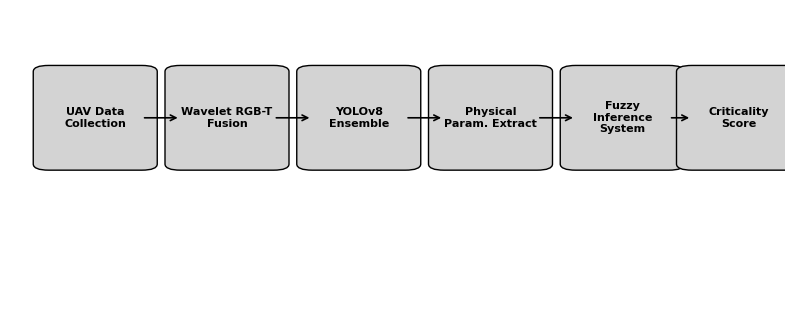

Saved: ./pipeline.png



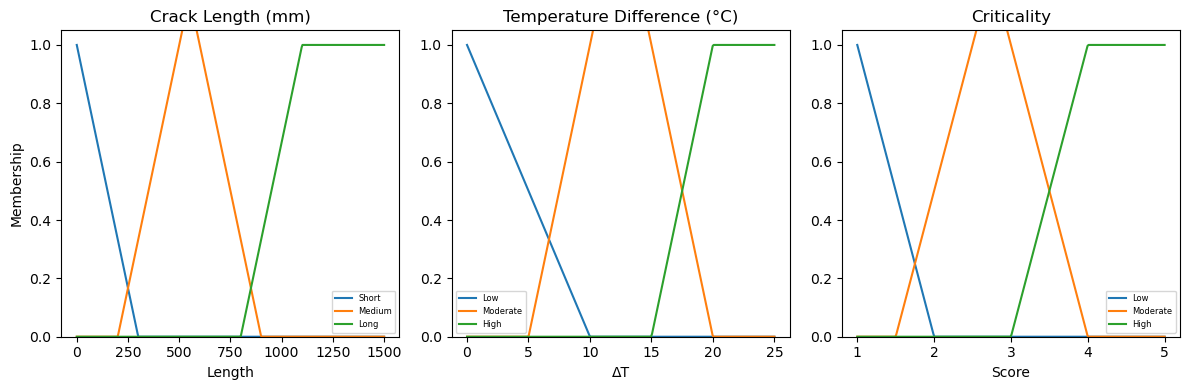

Saved: ./membership_functions.png



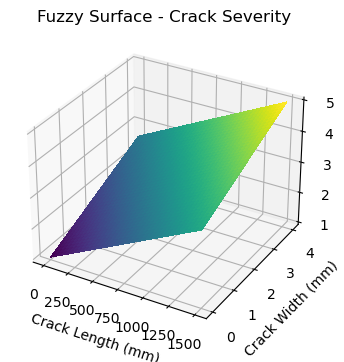

Saved: ./fuzzy_surface.png



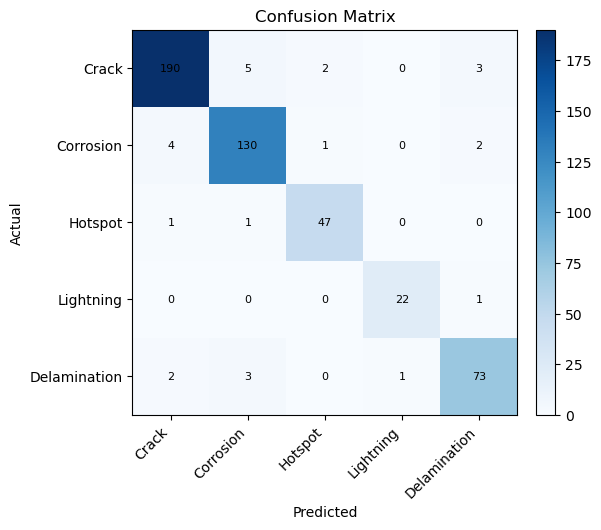

Saved: ./confusion_matrix.png



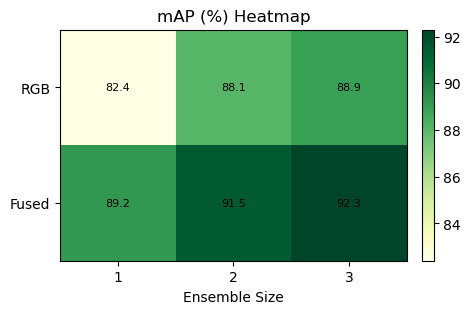

Saved: ./ablation_heatmap.png



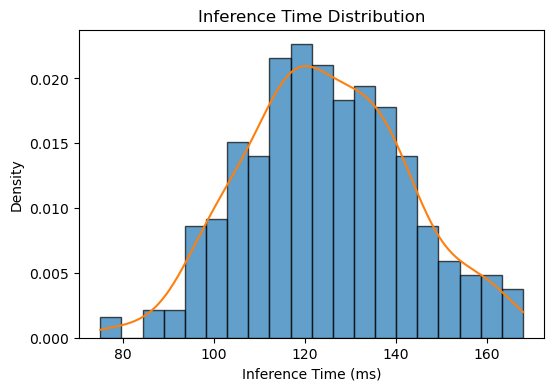

Saved: ./inference_time.png



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
import scipy.stats as stats
import pandas as pd

# Helper to save and show figure
def save_show(fig, name):
    path = f'./{name}.png'
    fig.savefig(path, dpi=300, bbox_inches='tight')
    plt.show(fig)
    print(f"Saved: {path}\n")

# -------------------------------------------------
# 1. Pipeline diagram
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# Define boxes
boxes = ["UAV Data\nCollection", "Wavelet RGB-T\nFusion", "YOLOv8\nEnsemble", "Physical\nParam. Extract", "Fuzzy\nInference\nSystem", "Criticality\nScore"]
coords = [(0.05, 0.5, 0.12, 0.3),
          (0.22, 0.5, 0.12, 0.3),
          (0.39, 0.5, 0.12, 0.3),
          (0.56, 0.5, 0.12, 0.3),
          (0.73, 0.5, 0.12, 0.3),
          (0.88, 0.5, 0.12, 0.3)]

for (x, y, w, h), text in zip(coords, boxes):
    rect = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.02", edgecolor='black', facecolor='lightgray')
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, text, ha='center', va='center', fontsize=8, weight='bold')
# Arrows
for i in range(len(coords)-1):
    x_tail = coords[i][0] + coords[i][2]
    x_head = coords[i+1][0]
    y_level = coords[i][1] + coords[i][3]/2
    ax.annotate('', xy=(x_head, y_level), xytext=(x_tail, y_level),
                arrowprops=dict(arrowstyle='->', linewidth=1.2))
save_show(fig, 'pipeline')

# -------------------------------------------------
# 2. Membership functions
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
x1 = np.linspace(0, 1500, 400)
short = np.maximum(0, np.minimum((300 - x1) / 300, 1))
medium = np.maximum(0, np.minimum((x1 - 200) / 300, (900 - x1) / 300))
long = np.maximum(0, np.minimum((x1 - 800) / 300, 1))
axes[0].plot(x1, short, label='Short')
axes[0].plot(x1, medium, label='Medium')
axes[0].plot(x1, long, label='Long')
axes[0].set_title('Crack Length (mm)')
axes[0].set_ylim(0, 1.05)
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Membership')
axes[0].legend(fontsize=6)

x2 = np.linspace(0, 25, 300)
low = np.maximum(0, np.minimum((10 - x2)/10, 1))
moderate = np.maximum(0, np.minimum((x2 - 5)/5, (20 - x2)/5))
high = np.maximum(0, np.minimum((x2 - 15)/5, 1))
axes[1].plot(x2, low, label='Low')
axes[1].plot(x2, moderate, label='Moderate')
axes[1].plot(x2, high, label='High')
axes[1].set_title('Temperature Difference (°C)')
axes[1].set_xlabel('ΔT')
axes[1].set_ylim(0, 1.05)
axes[1].legend(fontsize=6)

x3 = np.linspace(1, 5, 300)
low_c = np.maximum(0, np.minimum((2 - x3)/1, 1))
moderate_c = np.maximum(0, np.minimum((x3 - 1.5)/1, (4 - x3)/1))
high_c = np.maximum(0, np.minimum((x3 - 3)/1, 1))
axes[2].plot(x3, low_c, label='Low')
axes[2].plot(x3, moderate_c, label='Moderate')
axes[2].plot(x3, high_c, label='High')
axes[2].set_title('Criticality')
axes[2].set_xlabel('Score')
axes[2].set_ylim(0, 1.05)
axes[2].legend(fontsize=6)
fig.tight_layout()
save_show(fig, 'membership_functions')

# -------------------------------------------------
# 3. Fuzzy surface plot
LX, WX = np.meshgrid(np.linspace(0, 1500, 40), np.linspace(0, 4, 40))
# simple severity model: normalized = (0.6*len_norm + 0.4*width_norm)
len_norm = LX/1500
width_norm = WX/4
severity = 1 + 4*(0.6*len_norm + 0.4*width_norm)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(LX, WX, severity, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap='viridis')
ax.set_xlabel('Crack Length (mm)')
ax.set_ylabel('Crack Width (mm)')
ax.set_zlabel('Criticality')
ax.set_title('Fuzzy Surface - Crack Severity')
save_show(fig, 'fuzzy_surface')

# -------------------------------------------------
# 4. Confusion matrix
classes = ['Crack', 'Corrosion', 'Hotspot', 'Lightning', 'Delamination']
cm = np.array([[190, 5, 2, 0, 3],
               [4, 130, 1, 0, 2],
               [1, 1, 47, 0, 0],
               [0, 0, 0, 22, 1],
               [2, 3, 0, 1, 73]])
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticklabels(classes)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=8)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
save_show(fig, 'confusion_matrix')

# -------------------------------------------------
# 5. Ablation heatmap
modalities = ['RGB', 'Fused']
ensemble_sizes = [1,2,3]
heatmap = np.array([[82.4, 88.1, 88.9],
                    [89.2, 91.5, 92.3]])
fig, ax = plt.subplots(figsize=(5,3))
im = ax.imshow(heatmap, cmap='YlGn')
for i in range(len(modalities)):
    for j in range(len(ensemble_sizes)):
        ax.text(j, i, f"{heatmap[i,j]:.1f}", ha="center", va="center", color="black", fontsize=8)
ax.set_xticks(np.arange(len(ensemble_sizes)))
ax.set_yticks(np.arange(len(modalities)))
ax.set_xticklabels(ensemble_sizes)
ax.set_yticklabels(modalities)
ax.set_xlabel('Ensemble Size')
ax.set_title('mAP (%) Heatmap')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
save_show(fig, 'ablation_heatmap')

# -------------------------------------------------
# 6. Inference time histogram + KDE
np.random.seed(0)
times = np.random.normal(loc=125, scale=18, size=400)
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(times, bins=20, alpha=0.7, edgecolor='black', density=True)
kde_x = np.linspace(times.min(), times.max(), 300)
kde = stats.gaussian_kde(times)
ax.plot(kde_x, kde(kde_x), linewidth=1.5)
ax.set_xlabel('Inference Time (ms)')
ax.set_ylabel('Density')
ax.set_title('Inference Time Distribution')
save_show(fig, 'inference_time')
